**Load The Data**

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


**Exploratory Data Analysis**

In [2]:
df.shape

(32561, 15)

In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


**Identifying missing Values**

In [6]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


**Separating Input Features(x) and Target(y)**

In [7]:
X = df.drop("income", axis=1)
y = df["income"]


**Encoding Categorical Varaibles (One-hot Encoding)**

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [10]:
y = y.map({'<=50K': 0, '>50K': 1})


**Splitting Training & Testing Data**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Model Fitting**

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

**Making Prediction**

In [16]:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 0]


**Model Evalution**

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score=accuracy_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)
print("accuracy_score",accuracy_score)
print("confusion_matrix",confusion_matrix)
print("classification_report",classification_report)

accuracy_score 0.8593582066635959
confusion_matrix [[4779  197]
 [ 719  818]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4976
           1       0.81      0.53      0.64      1537

    accuracy                           0.86      6513
   macro avg       0.84      0.75      0.78      6513
weighted avg       0.85      0.86      0.85      6513



**Feature Importance**

In [18]:

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


           Feature  Importance
10    capital.gain    0.209585
7     relationship    0.192296
4    education.num    0.140267
5   marital.status    0.123081
0              age    0.089482
11    capital.loss    0.057376
12  hours.per.week    0.052227
3        education    0.039522
6       occupation    0.034438
9              sex    0.021037
2           fnlwgt    0.019787
1        workclass    0.011339
13  native.country    0.005410
8             race    0.004153


**Feature Importance Visualization**

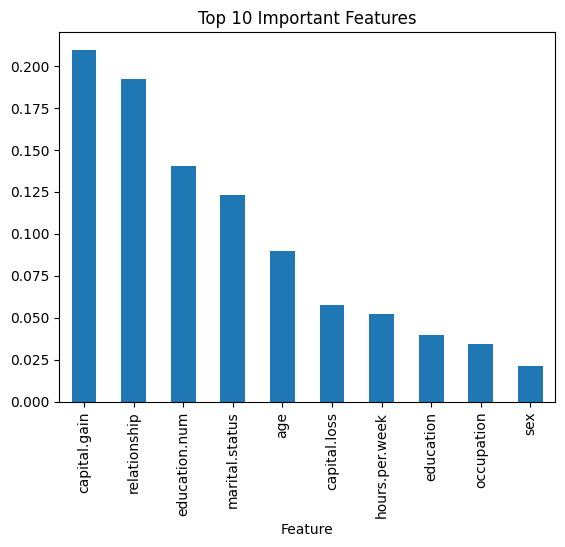

In [20]:
import matplotlib.pyplot as plt
feature_importance_df.head(10).plot(
    x='Feature',
    y='Importance',
    kind='bar',
    legend=False,
    title='Top 10 Important Features'
)
plt.show()
